   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4

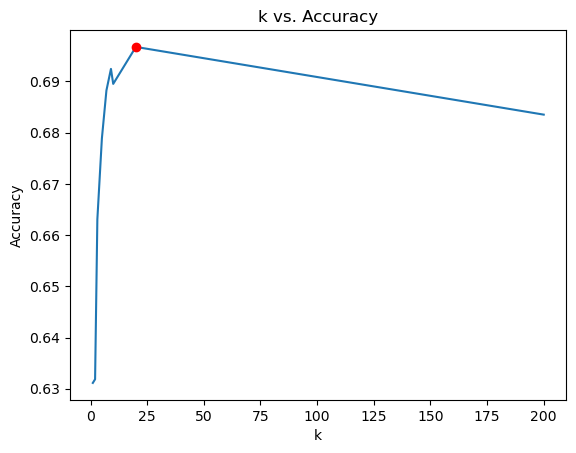

0.6943285714285714


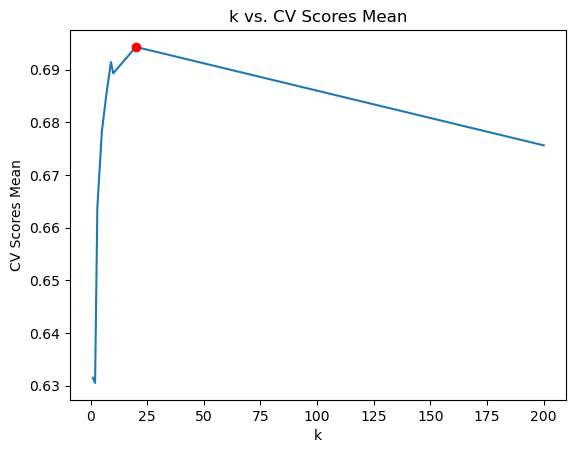

[0.6415714285714286, 0.6387142857142857, 0.674, 0.6891428571428572, 0.6967142857142857, 0.7005714285714286, 0.6998571428571428, 0.7062857142857143, 0.6887142857142857]
0.7062857142857143


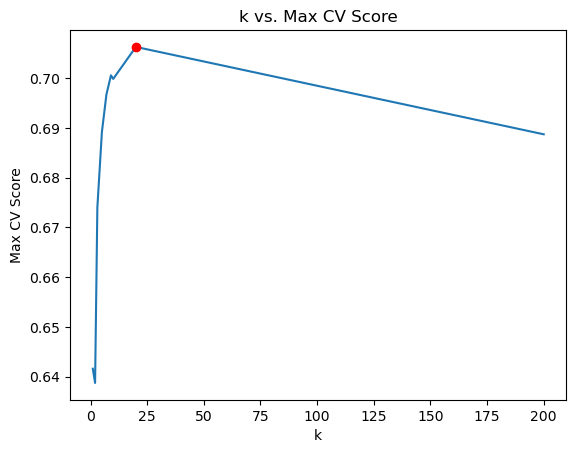

In [11]:
#imports
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
random.seed(42)

#loading the data set
data = pd.read_csv('cardio_train.csv', sep = ';')
data_copy = data

##############################checking data set##################################

print(data.head())

#check data types
print(data.info())

#############################data preprocessing##################################

#check for null values
null_rows = data[data.isnull().any(axis=1)].head()
print(null_rows.head()) #-->no null values 

#check whether data set is balanced
sick = data['cardio'].value_counts()[1]
healthy = len(data) - data['cardio'].value_counts()[1]
print("sick: ", sick, "individuals; healthy: ", healthy, "individuals\n")

#check correlations
data_corr = data_copy.drop(columns=['gender', 'cholesterol', 'gluc','smoke','alco','active'])
print(data_corr.corr()['cardio'])

data_target = data['cardio']

#dropping the label column & id
data = data.drop(columns=['cardio','id','height'])

#convert age to years so we can interpret it better

data['age'] = data['age'] / 365

#one-hot encoding the categorical features & normalizing the numerical features

numerical_features = ['age','weight', 'ap_hi', 'ap_lo']
categorical_features = ['gender', 'cholesterol', 'gluc','smoke',
                        'alco','active']
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
     ("cat", OneHotEncoder(), categorical_features)
    ])

data = full_pipeline.fit_transform(data)

################################training & testing#########################################

train, test, target, target_test = train_test_split(data, data_target, test_size = 0.2, random_state = 42)

k_values = [1, 2, 3, 5, 7, 9, 10, 20, 200]
accuracies = []
cv_scores_list = []
cv_scores_list_max = []

#accuracy scores
for k in k_values:
    knn_obj = KNeighborsClassifier(n_neighbors = k)
    knn_obj.fit(train, target)
    predicted = knn_obj.predict(test)
    accuracies.append(metrics.accuracy_score(target_test, predicted))

#cross validation
for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, data, data_target, cv=10)
    #average of cv scores
    cv_scores_list.append(np.mean(cv_scores))
    cv_scores_list_max.append(np.max(cv_scores))

#k value vs. accuracy visualization
x = k_values
y = accuracies
x_plot = 20
y_plot = accuracies[7]
print(y_plot)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs. Accuracy")
plt.plot(x,y)
plt.plot(x_plot, y_plot, 'o', color = 'red')
plt.show()

#mean cv score vs. accuracy visualization
y = cv_scores_list
x_plot = 20
y_plot = cv_scores_list[7]
print(y_plot)
plt.xlabel("k")
plt.ylabel("CV Scores Mean")
plt.title("k vs. CV Scores Mean")
plt.plot(x,y)
plt.plot(x_plot, y_plot, 'o', color = 'red')
plt.show()

#mean cv score vs. accuracy visualization
y = cv_scores_list_max
print(cv_scores_list_max)
x_plot = 20
y_plot = cv_scores_list_max[7]
print(y_plot)
plt.xlabel("k")
plt.ylabel("Max CV Score")
plt.title("k vs. Max CV Score")
plt.plot(x,y)
plt.plot(x_plot, y_plot, 'o', color = 'red')
plt.show()


